<a href="https://colab.research.google.com/github/HootlingGondlier/Runge-Kutta-tryouts/blob/main/RK_tryouts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

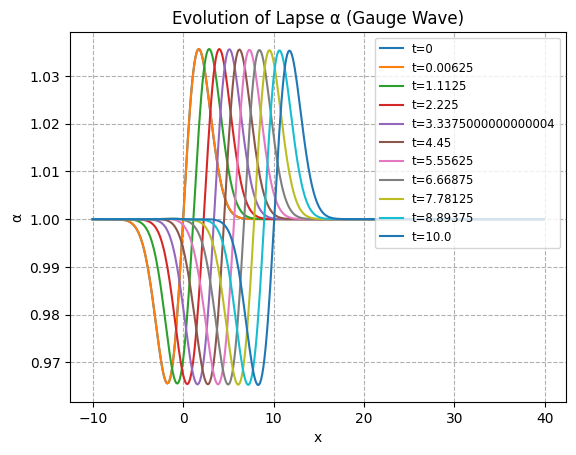

In [2]:
import numpy as np
import matplotlib.pyplot as plt

N = 400                                  # Number of spatial points
L_start, L_end = -10, 40                 # Domain boundaries
x = np.linspace(L_start, L_end, N, endpoint=False)
dx = (L_end - L_start) / N
dt = 0.05 * dx                           # CFL factor
t = 10                            # Total evolution time
t_start = 0
steps = int(t / dt)

# Initial Conditions (t=0)
times = np.linspace(0, t, 10)
history_alpha = []

# Profile function h(x) and its derivatives
h = 0.1 * np.exp(-x**2 / 6)
h_prime = -(x / 3) * h
h_pprime = ((x**2 / 9) - (1/3)) * h

# Initializing variables based on the task description
g = 1 - h_prime**2
Dg = -2 * h_prime * h_pprime / g
K_tilda = -h_pprime
alpha = ((1 - h_prime) / (1 + h_prime))**(0.5)
D_alpha = -h_pprime / g

# State vector U
U = np.array([g, Dg, K_tilda, alpha, D_alpha])

# Helper Functions
def spatial_derivative(field):

    return (np.roll(field, -1) - np.roll(field, 1)) / (2 * dx)

def get_rhs(U_vec):

    g_s, Dg_s, Kt_s, a_s, Da_s = U_vec

    # Auxiliary variable K = K_tilde / sqrt(g)
    K = Kt_s * (g_s**-0.5)

    # Evolution equations
    dt_g = -2 * a_s * g_s * K
    dt_Dg = -spatial_derivative(2 * a_s * K)
    dt_Kt = -spatial_derivative(a_s * Da_s * (g_s**-0.5))
    dt_a = -(a_s**2) * K                 # Using f=1
    dt_Da = -spatial_derivative(a_s * K) # Using f=1

    return np.array([dt_g, dt_Dg, dt_Kt, dt_a, dt_Da])

# RK4 Time Integration
history_alpha = [(0, alpha.copy())]

for step in range(steps):
    k1 = get_rhs(U)
    k2 = get_rhs(U + 0.5 * dt * k1)
    k3 = get_rhs(U + 0.5 * dt * k2)
    k4 = get_rhs(U + dt * k3)

    U += (dt / 6.0) * (k1 + 2*k2 + 2*k3 + k4)

    # Storing values for the plot
    current_t = (step + 1) * dt
    if t_start < len(times) and current_t >= times[t_start]:
        history_alpha.append((current_t, U[3].copy()))
        t_start += 1



for t_val, alpha_val in history_alpha:
    plt.plot(x, alpha_val, label=f't={t_val:}')

plt.title("Evolution of Lapse α (Gauge Wave)")
plt.xlabel("x")
plt.ylabel("α")
plt.legend(loc='upper right', fontsize='small', framealpha=0.8)
plt.grid(True, linestyle='--')
plt.show()

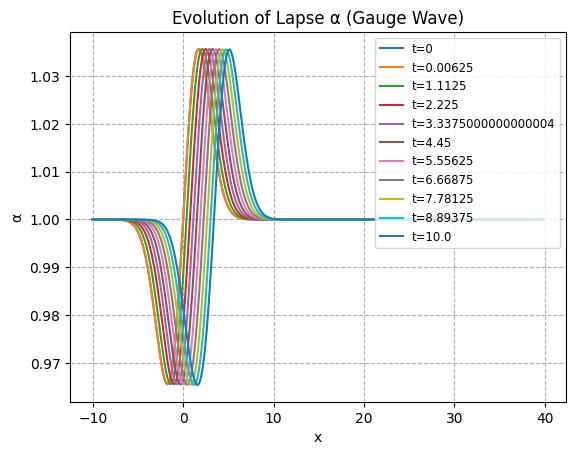

In [3]:
#RK2

import numpy as np
import matplotlib.pyplot as plt

N = 400                                  # Number of spatial points
L_start, L_end = -10, 40                 # Domain boundaries
x = np.linspace(L_start, L_end, N, endpoint=False)
dx = (L_end - L_start) / N
dt = 0.05 * dx                           # CFL factor
t = 10                            # Total evolution time
t_start = 0
steps = int(t / dt)

# Initial Conditions (t=0)
times = np.linspace(0, t, 10)
history_alpha = []

# Profile function h(x) and its derivatives
h = 0.1 * np.exp(-x**2 / 6)
h_prime = -(x / 3) * h
h_pprime = ((x**2 / 9) - (1/3)) * h

# Initializing variables based on the task description
g = 1 - h_prime**2
Dg = -2 * h_prime * h_pprime / g
K_tilda = -h_pprime
alpha = ((1 - h_prime) / (1 + h_prime))**(0.5)
D_alpha = -h_pprime / g

# State vector U
U = np.array([g, Dg, K_tilda, alpha, D_alpha])

# Helper Functions
def spatial_derivative(field):

    return (np.roll(field, -1) - np.roll(field, 1)) / (2 * dx)

def get_rhs(U_vec):

    g_s, Dg_s, Kt_s, a_s, Da_s = U_vec

    # Auxiliary variable K = K_tilde / sqrt(g)
    K = Kt_s * (g_s**-0.5)

    # Evolution equations
    dt_g = -2 * a_s * g_s * K
    dt_Dg = -spatial_derivative(2 * a_s * K)
    dt_Kt = -spatial_derivative(a_s * Da_s * (g_s**-0.5))
    dt_a = -(a_s**2) * K                 # Using f=1
    dt_Da = -spatial_derivative(a_s * K) # Using f=1

    return np.array([dt_g, dt_Dg, dt_Kt, dt_a, dt_Da])

# RK4 Time Integration
history_alpha = [(0, alpha.copy())]

for step in range(steps):
    k1 = get_rhs(U)
    k2 = get_rhs(U + 0.5 * dt * k1)


    U += (dt / 6.0) * (k1 + k2)

    # Storing values for the plot
    current_t = (step + 1) * dt
    if t_start < len(times) and current_t >= times[t_start]:
        history_alpha.append((current_t, U[3].copy()))
        t_start += 1



for t_val, alpha_val in history_alpha:
    plt.plot(x, alpha_val, label=f't={t_val:}')

plt.title("Evolution of Lapse α (Gauge Wave)")
plt.xlabel("x")
plt.ylabel("α")
plt.legend(loc='upper right', fontsize='small', framealpha=0.8)
plt.grid(True, linestyle='--')
plt.show()